# **DATA PREPROCESSING**

In [32]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('reddit_preprocessing.csv')
df.head()

,clean_comment,category
0,family mormon never tried explain still stare ...,1
1,buddhism much lot compatible christianity espe...,1
2,seriously say thing first get complex explain ...,-1
3,learned want teach different focus goal not wr...,0
4,benefit may want read living buddha living chr...,1


In [3]:
df.shape

(36793, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36793 entries, 0 to 36792
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   clean_comment  36662 non-null  object
 1   category       36793 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 575.0+ KB


In [8]:
df.isnull().sum()

clean_comment    131
category           0
dtype: int64

In [12]:
df[df['clean_comment'].isnull()]

,clean_comment,category
287,NaN,0
821,NaN,0
922,NaN,0
934,NaN,0
1169,NaN,0
...,...,...
36358,NaN,0
36563,NaN,0
36599,NaN,0
36731,NaN,0


In [18]:
df.dropna(inplace=True)
df.isnull().sum()

clean_comment    0
category         0
dtype: int64

In [20]:
df.duplicated().sum()
df[df.duplicated()]

,clean_comment,category
1376,jpg,0
1397,good,1
1430,real bhagoda,1
1561,think,0
2340,cringe,0
...,...,...
36751,nice try,1
36768,vote,0
36770,would,0
36776,nice try,1


In [27]:
df[(df['clean_comment'].str.strip() == ' ')].sum()

clean_comment    0
category         0
dtype: object

In [24]:
#converting all data in lower case
df['clean_comment'] = df['clean_comment'].str.lower()
df.head()

,clean_comment,category
0,family mormon never tried explain still stare ...,1
1,buddhism much lot compatible christianity espe...,1
2,seriously say thing first get complex explain ...,-1
3,learned want teach different focus goal not wr...,0
4,benefit may want read living buddha living chr...,1


In [26]:
df[df['clean_comment'].apply(lambda x: x.endswith(' ') or x.startswith(' '))].sum()

clean_comment    0
category         0
dtype: object

In [29]:
# intentifying comments containing URLs
url_pattern = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
comment_with_url = df[df['clean_comment'].str.contains(url_pattern, regex=True)]

comment_with_url.sum()

clean_comment    0
category         0
dtype: object

In [30]:
# identifying comments contaning new line chahcters
comment_with_newline = df[df['clean_comment'].str.contains('\n')]
comment_with_newline.sum()

clean_comment    0
category         0
dtype: object

In [31]:
# remove newline comment from clean comment
df['clean_comment'] = df['clean_comment'].str.replace('\n', ' ', regex=True)
comment_with_newline_remaining = df['clean_comment'].str.contains("\n")
comment_with_newline_remaining.sum()

np.int64(0)

# **EDA**

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='category', ylabel='count'>

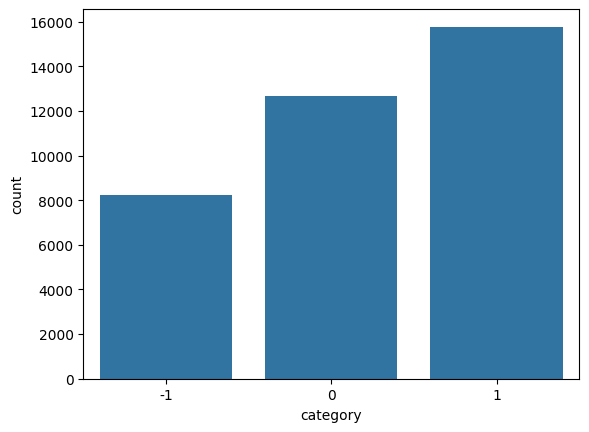

In [39]:
sns.countplot(data=df, x="category")

In [40]:
df['category'].value_counts(normalize=True).mul(100).round(2)

category
 1    43.01
 0    34.49
-1    22.50
Name: proportion, dtype: float64

In [42]:
df['word_count'] = df['clean_comment'].apply(lambda x: len(x.split()))
df.sample(5)

,clean_comment,category,word_count
1887,like koffie reo coker interacting,0,5
26683,gross exaggeration india nothing significant s...,1,6
25417,serf dipshit right supporter believe ram rajya...,1,13
20204,tamil nadu,0,2
2572,ironic exact moment reading guy sitting next m...,1,15


In [44]:
df['word_count'].describe()

count    36662.000000
mean        20.162048
std         39.124786
min          1.000000
25%          5.000000
50%          9.000000
75%         20.000000
max        893.000000
Name: word_count, dtype: float64

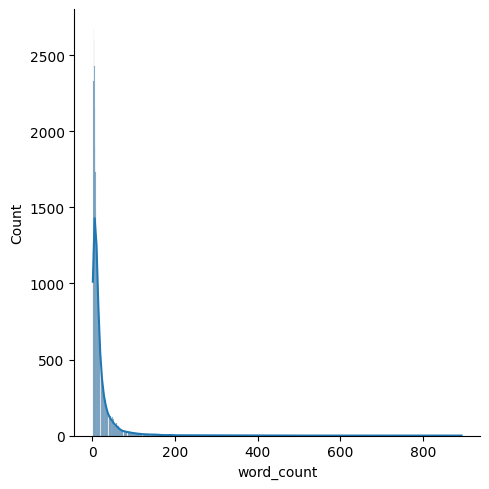

In [46]:
sns.displot(df['word_count'], kde=True)

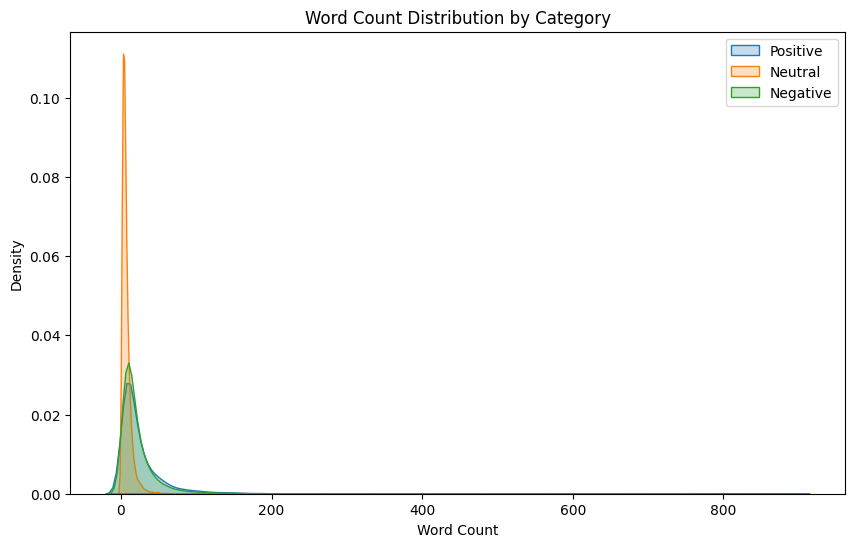

In [47]:
# Create the figure and axes
plt.figure(figsize=(10, 6))

# Plot KDE for category 1
sns.kdeplot(df[df['category'] == 1]['word_count'], label='Positive', fill=True)

# Plot KDE for category 0
sns.kdeplot(df[df['category'] == 0]['word_count'], label='Neutral', fill=True)

# Plot KDE for category -1
sns.kdeplot(df[df['category'] == -1]['word_count'], label='Negative', fill=True)

# Add title and labels
plt.title('Word Count Distribution by Category')
plt.xlabel('Word Count')
plt.ylabel('Density')

# Add a legend
plt.legend()

# Show the plot
plt.show()

<Axes: ylabel='word_count'>

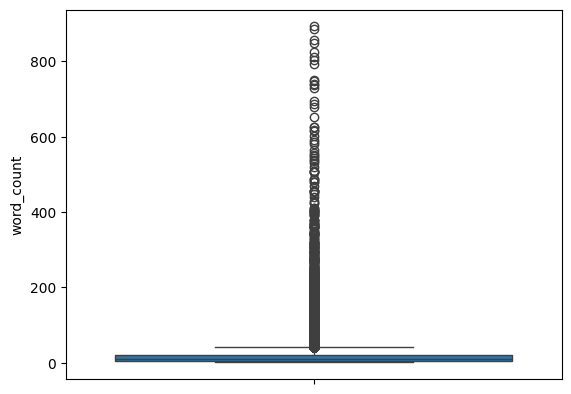

In [48]:
sns.boxplot(df['word_count'])